In [1]:
# Dependencies and Setup
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime,date

# File to Load
CESDF=pd.read_pickle('resources/CES2020.pkl',compression='gzip')
# Preview of the DataFrame
CESDF.head()

,series_id,year,value,industry_code_x,Month,supersector_code,data_type_code,series_title,supersector_name,data_type_text,short_title
0,CES0000000001,2015,140568.0,00000000,1,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees
1,CES0000000001,2015,140839.0,00000000,2,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees
2,CES0000000001,2015,140910.0,00000000,3,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees
3,CES0000000001,2015,141194.0,00000000,4,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees
4,CES0000000001,2015,141525.0,00000000,5,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees


In [2]:
# Check for correct data types - need to convert
CESDF.dtypes

series_id            object
year                  int64
value               float64
industry_code_x      object
Month                 int32
supersector_code     object
data_type_code       object
series_title         object
supersector_name     object
data_type_text       object
short_title          object
dtype: object

In [3]:
# Check column names for spaces - looks good
CESDF.columns

Index(['series_id', 'year', 'value', 'industry_code_x', 'Month',
       'supersector_code', 'data_type_code', 'series_title',
       'supersector_name', 'data_type_text', 'short_title'],
      dtype='object')

In [4]:
# Identify incomplete rows
CESDF.count()

series_id           3958
year                3958
value               3958
industry_code_x     3958
Month               3958
supersector_code    3958
data_type_code      3958
series_title        3958
supersector_name    3958
data_type_text      3958
short_title         3958
dtype: int64

In [5]:
# Drop all rows with missing information
# df = unemployment_df.dropna(how='any')

In [6]:
# Verify dropped rows
CESDF.count()

series_id           3958
year                3958
value               3958
industry_code_x     3958
Month               3958
supersector_code    3958
data_type_code      3958
series_title        3958
supersector_name    3958
data_type_text      3958
short_title         3958
dtype: int64

In [7]:
# Check states values
CESDF['series_id'].nunique()

62

In [8]:
# Display a statistical overview for a high level insight into the data
CESDF.describe()

,year,value,Month
count,3958.000000,3958.000000,3958.000000
mean,2017.180394,19163.943861,6.255685
std,1.545633,32045.982010,3.494074
min,2015.000000,90.000000,1.000000
25%,2016.000000,2801.250000,3.000000
50%,2017.000000,7693.750000,6.000000
75%,2018.000000,16322.000000,9.000000
max,2020.000000,152463.000000,12.000000


In [9]:
series = ["CES0000000001","CES0500000001","CES0600000001","CES0700000001","CES0800000001",
"CES1000000001","CES2000000001","CES3000000001","CES3100000001","CES3200000001",
"CES4000000001","CES4200000001","CES4300000001","CES5000000001","CES5500000001",
"CES5552000001","CES5553000001","CES6000000001","CES6054000001","CES6055000001",
"CES6056000001","CES6500000001","CES6561000001","CES6562000001","CES7000000001",
"CES7071000001","CES7072000001","CES8000000001","CES9000000001","CES9091000001",
"CES9092000001","CES9093000001"]


condition = CESDF['series_id'].isin(series)
CESSeriesDF = CESDF[condition]
CESSeriesDF.head()

,series_id,year,value,industry_code_x,Month,supersector_code,data_type_code,series_title,supersector_name,data_type_text,short_title
0,CES0000000001,2015,140568.0,00000000,1,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees
1,CES0000000001,2015,140839.0,00000000,2,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees
2,CES0000000001,2015,140910.0,00000000,3,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees
3,CES0000000001,2015,141194.0,00000000,4,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees
4,CES0000000001,2015,141525.0,00000000,5,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees


In [10]:
CESSeriesDF.shape

(2048, 11)

In [12]:
df = CESSeriesDF[['year','Month','value','short_title']]
df['date']=df['year'].astype(str) + "-"+ df['Month'].astype(str) 
df.head()

e:\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,series_id,year,Month,value,short_title,date
0,CES0000000001,2015,1,140568.0,All employees,2015-1
1,CES0000000001,2015,2,140839.0,All employees,2015-2
2,CES0000000001,2015,3,140910.0,All employees,2015-3
3,CES0000000001,2015,4,141194.0,All employees,2015-4
4,CES0000000001,2015,5,141525.0,All employees,2015-5


In [13]:
df = pd.pivot_table(df,index=['date'],values=['value'],columns=['short_title'])

df.head()

value                                                \
short_title All employees All employees accommodation and food services   
date                                                                      
2015-1           140568.0                                       12790.7   
2015-10          142587.0                                       13133.2   
2015-11          142824.0                                       13174.9   
2015-12          143097.0                                       13210.7   
2015-2           140839.0                                       12843.2   

                                                             \
short_title All employees administrative and waste services   
date                                                          
2015-1                                               8719.9   
2015-10                                              8891.2   
2015-11                                              8898.2   
2015-12                                              8959.1   
2015-2                                               8732.4   

                                                             \
short_title All employees arts entertainment and recreation   
date                                                          
2015-1                                               2124.7   
2015-10                                              2182.6   
2015-11                                              2198.6   
2015-12                                              2194.9   
2015-2                                               2129.2   

                                                                    \
short_title All employees construction All employees durable goods   
date                                                                 
2015-1                          6320.0                      7752.0   
2015-10                         6547.0                      7770.0   
2015-11                         6598.0                      7756.0   
2015-12                         6630.0                      7750.0   
2015-2                          6361.0                      7760.0   

                                                         \
short_title All employees education and health services   
date                                                      
2015-1                                          21741.0   
2015-10                                         22215.0   
2015-11                                         22260.0   
2015-12                                         22323.0   
2015-2                                          21789.0   

                                                                      \
short_title All employees educational services All employees federal   
date                                                                   
2015-1                                  3439.1                2745.0   
2015-10                                 3490.3                2759.0   
2015-11                                 3502.0                2766.0   
2015-12                                 3526.3                2776.0   
2015-2                                  3448.4                2747.0   

                                                 ...                        \
short_title All employees finance and insurance  ... All employees private   
date                                             ...                         
2015-1                                   5990.9  ...              118608.0   
2015-10                                  6067.0  ...              120531.0   
2015-11                                  6075.2  ...              120743.0   
2015-12                                  6079.1  ...              121000.0   
2015-2                                   5998.8  ...              118861.0   

                                                     \
short_title All employees private service-providing   
date                                                  
2015-1  

In [ ]:
# Re

In [15]:
df.reset_index(inplace=True)
df.columns

MultiIndex([( 'date',                                                      ''),
            ('value',                                         'All employees'),
            ('value',         'All employees accommodation and food services'),
            ('value',       'All employees administrative and waste services'),
            ('value',       'All employees arts entertainment and recreation'),
            ('value',                            'All employees construction'),
            ('value',                           'All employees durable goods'),
            ('value',           'All employees education and health services'),
            ('value',                    'All employees educational services'),
            ('value',                                 'All employees federal'),
            ('value',                   'All employees finance and insurance'),
            ('value',                    'All employees financial activities'),
            ('value',                   

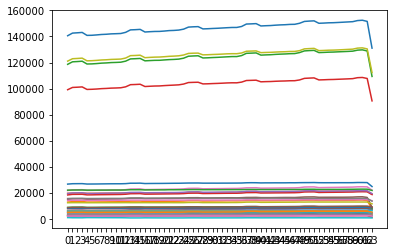

In [17]:
ax = df.plot(xticks=df.index,legend=False)
